## Thera Bank Personal Loan Campaign
#### Data Description:
The dataset contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer's relationship with the bank (mortgage, securities
account, etc.), and the customer response to the last personal loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to
them in the earlier campaign.

#### Domain:

Banking

#### Context:

This case is about a bank (Thera Bank) whose management wants to explore ways of converting
its liability customers to personal loan customers (while retaining them as depositors). A
campaign that the bank ran last year for liability customers showed a healthy conversion rate of
over 9% success. This has encouraged the retail marketing department to devise campaigns
with better target marketing to increase the success ratio with a minimal budget.

#### Attribute Information:

* ID:            Customer ID
* Age:           Customer's age in completed years
* Experience:    years of professional experience
* Income:        Annual income of the customer 
* ZIP Code:      Home Address ZIP code
* Family:        Family size of the customer
* CCAvg:         Avg. spending on credit cards per month 
* Education:     Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage:      Value of house mortgage if any. 
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?

#### Learning Outcomes:
* Exploratory Data Analysis
* Preparing the data to train a model
* Training and making predictions using a classification model
* Model evaluation

#### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

In [97]:
#Import the datasets and libraries
import numpy as np
import pandas as pd
# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(color_codes=True) #---------------adds hue to the color
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection

import os

In [98]:
# Importing the Datasets
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [99]:
#statistical summary , checking datatype, null values , shapes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [100]:
#checking null values but there are none
df.isna().apply(pd.value_counts)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


In [101]:
#Experience has negative values so we will replace them
any(df['Experience'] < 0)

True

In [102]:
exp_med = df.loc[:,"Experience"].median()
df.loc[:, 'Experience'].replace([-1, -2, -3], [exp_med, exp_med, exp_med], inplace=True)

In [103]:
#checking if it has any negative values remaining
any(df['Experience'] < 0)

False

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### 2. EDA: Study the data distribution in each attribute and target variable, share your findings.

#### 2.1 Number of unique in column(s)

In [105]:
df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

#### 2.2 Number of people with zero mortgage

In [106]:
print ("Number of people with zero mortgage:", (df['Mortgage']==0).sum())


Number of people with zero mortgage: 3462


#### 2.3 Number of people with zero credit card spending per month

In [107]:
print("Number of people with zero credit card spending per month:", (df['CCAvg']==0).sum())

Number of people with zero credit card spending per month: 106


#### 2.4 value counts for all categorical fields


In [108]:
for col in ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']:
    print('\nColumn:', col)         # "\n" indicates new line
    print(df[col].value_counts())


Column: Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64

Column: Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64

Column: Securities Account
0    4478
1     522
Name: Securities Account, dtype: int64

Column: CD Account
0    4698
1     302
Name: CD Account, dtype: int64

Column: Online
1    2984
0    2016
Name: Online, dtype: int64

Column: CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64


#### 2.5 Univariate Analysis of the continuous variables

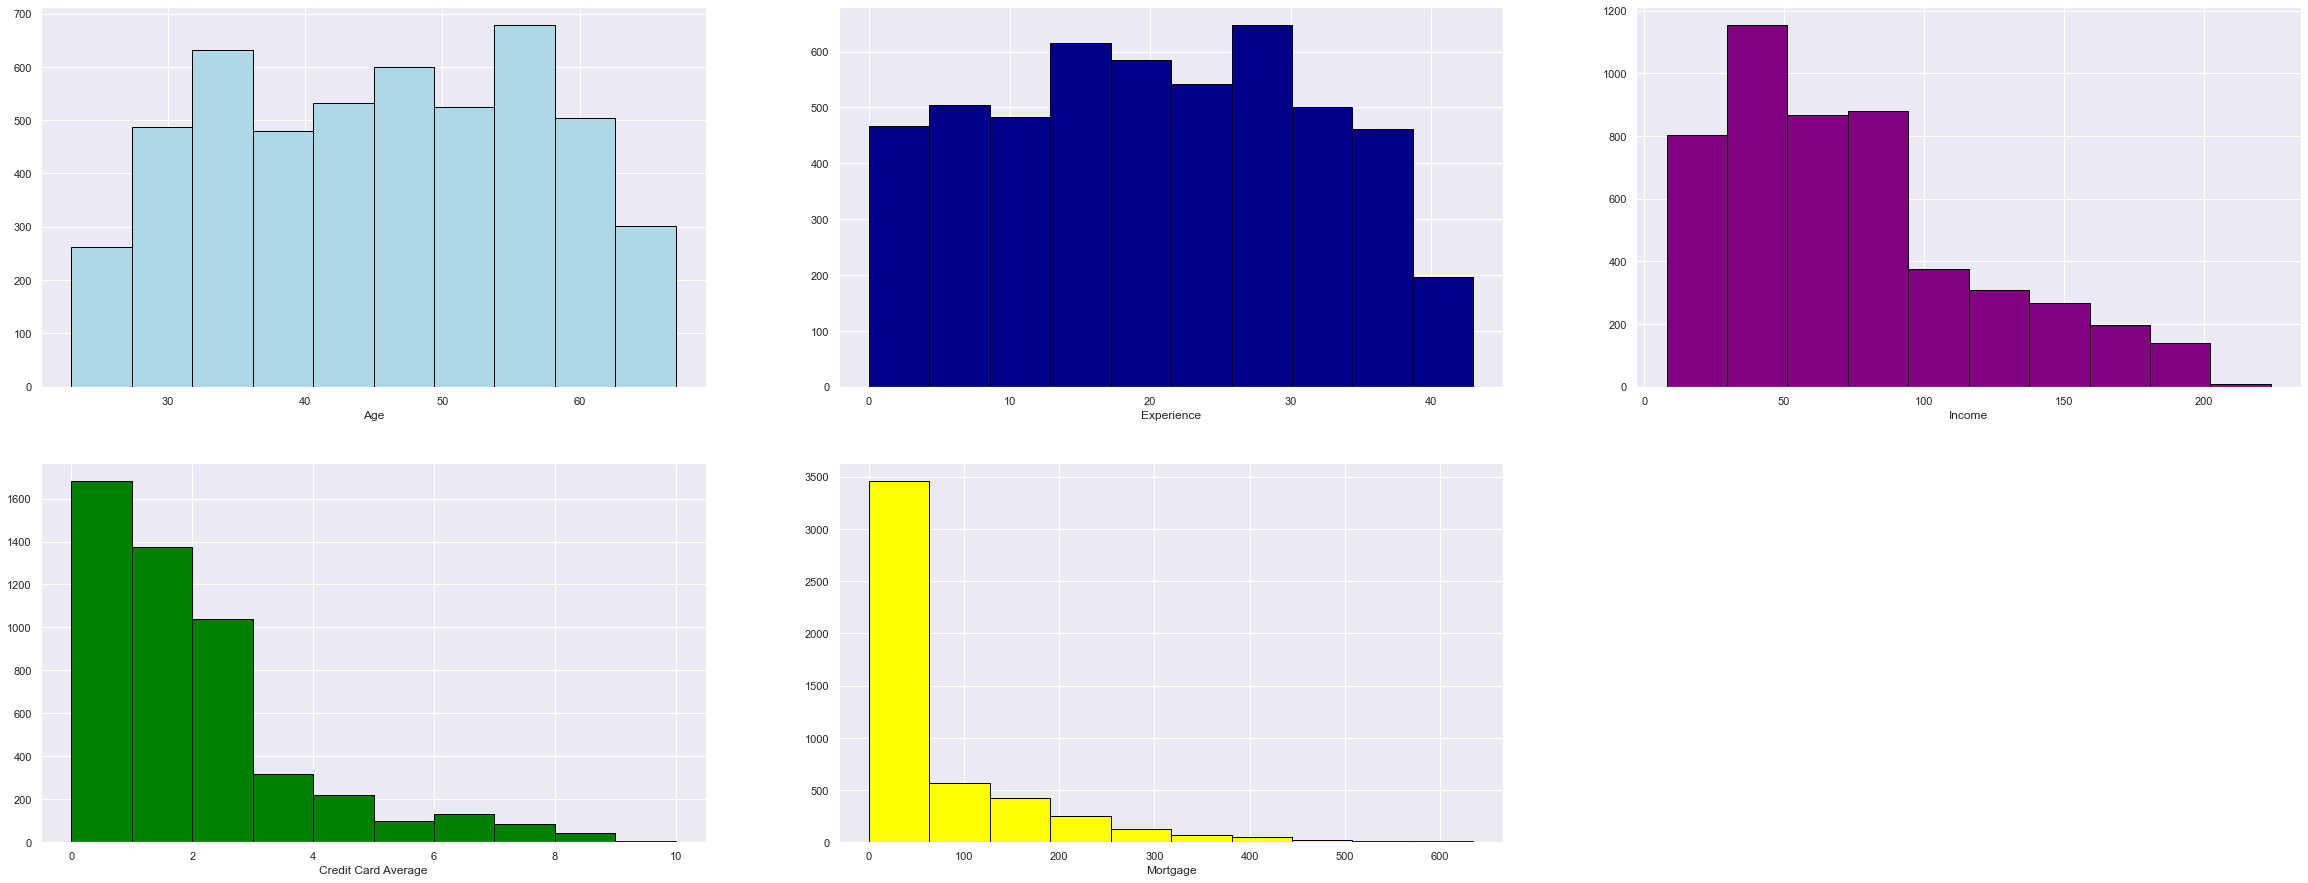

In [109]:

plt.figure(figsize= (40.5,40.5))
plt.subplot(5,3,1)
plt.hist(df.Age, color='lightblue', edgecolor = 'black')
plt.xlabel('Age')

plt.subplot(5,3,2)
plt.hist(df.Experience, color='darkblue', edgecolor = 'black')
plt.xlabel('Experience')

plt.subplot(5,3,3)
plt.hist(df.Income, color='purple', edgecolor = 'black')
plt.xlabel('Income')

plt.subplot(5,3,4)
plt.hist(df.CCAvg, color='green', edgecolor = 'black')
plt.xlabel('Credit Card Average')

plt.subplot(5,3,5)
plt.hist(df.Mortgage, color='yellow', edgecolor = 'black')
plt.xlabel('Mortgage')

plt.show()

#### 2.6 Univariate Analysis of the categorical variables

Text(0.5, 1.0, 'Credit Card Distribution')

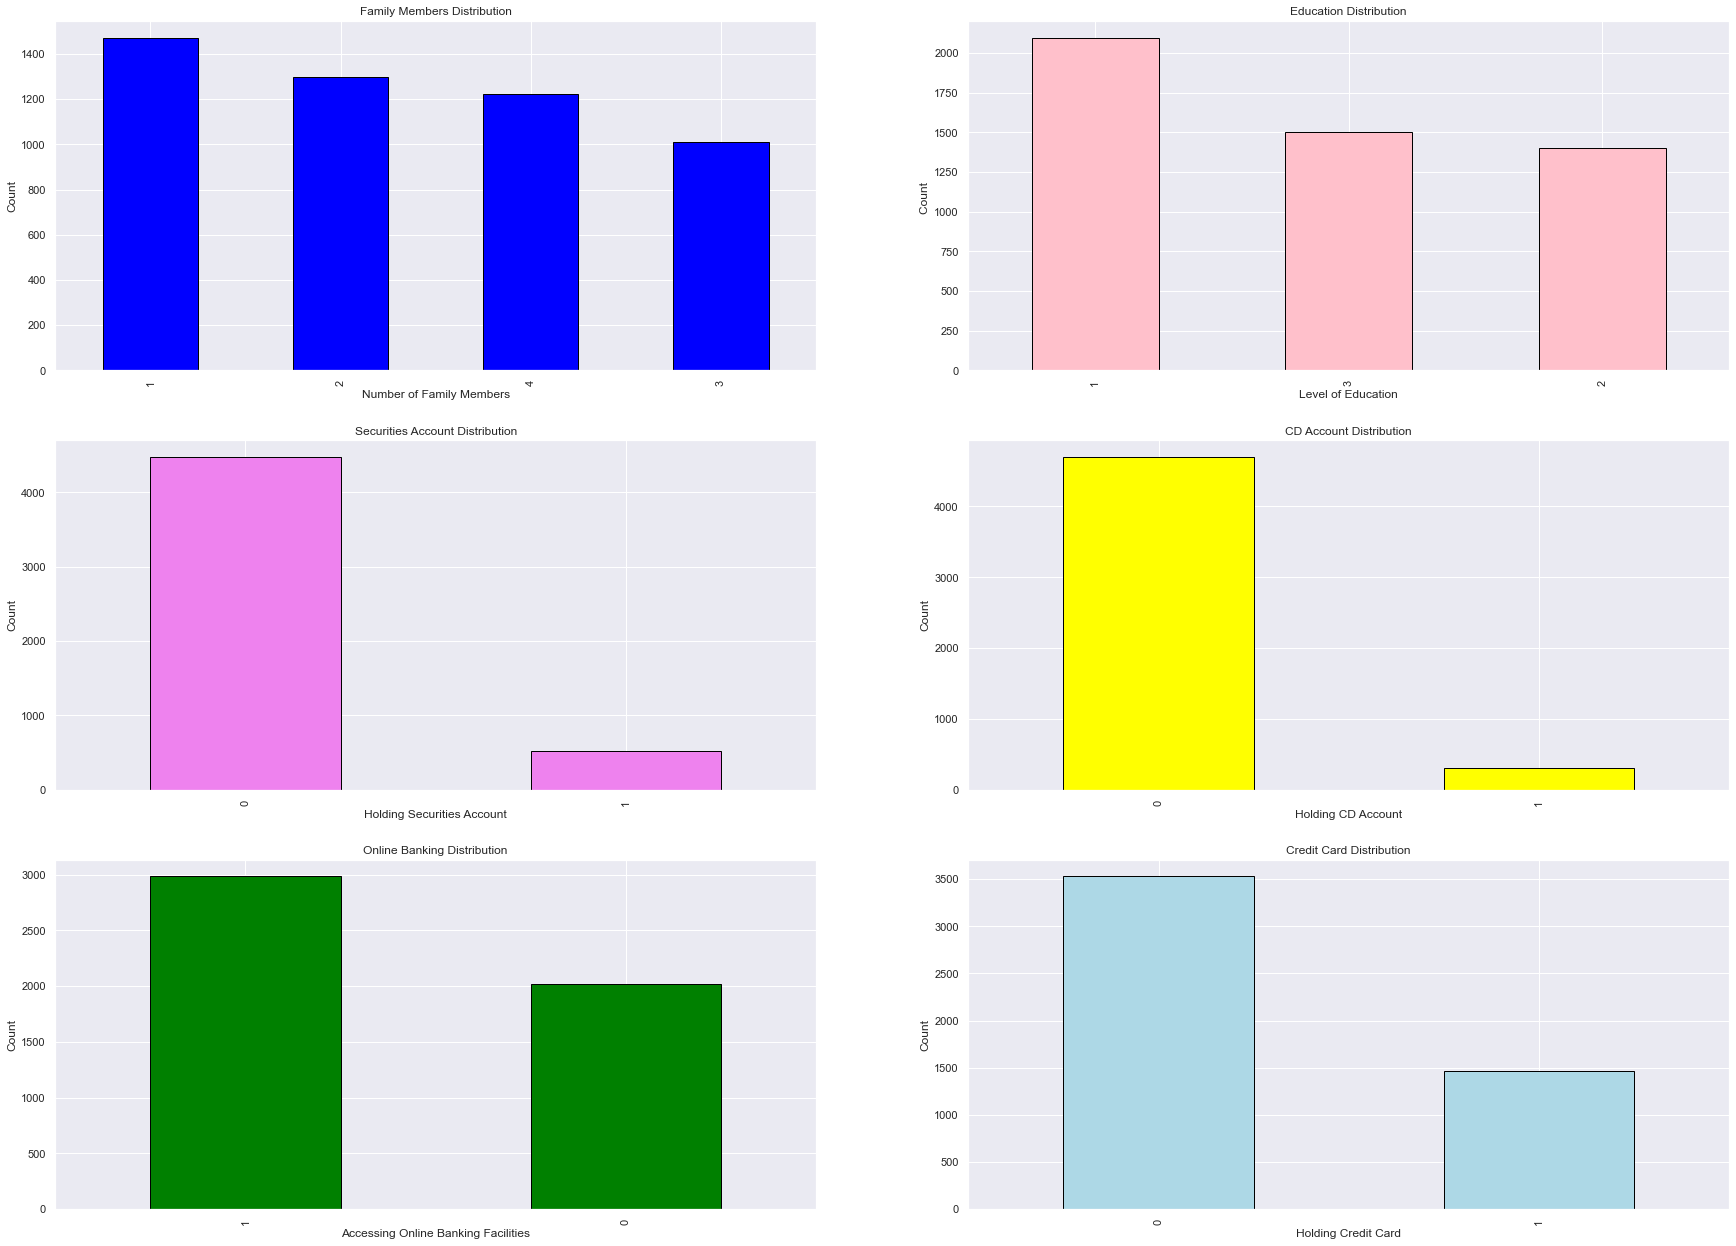

In [110]:

plt.figure(figsize=(30,45))


plt.subplot(6,2,1)
df['Family'].value_counts().plot(kind="bar", align='center',color = 'blue',edgecolor = 'black')
plt.xlabel("Number of Family Members")
plt.ylabel("Count")
plt.title("Family Members Distribution")


plt.subplot(6,2,2)
df['Education'].value_counts().plot(kind="bar", align='center',color = 'pink',edgecolor = 'black')
plt.xlabel('Level of Education')
plt.ylabel('Count ')
plt.title('Education Distribution')


plt.subplot(6,2,3)
df['Securities Account'].value_counts().plot(kind="bar", align='center',color = 'violet',edgecolor = 'black')
plt.xlabel('Holding Securities Account')
plt.ylabel('Count')
plt.title('Securities Account Distribution')


plt.subplot(6,2,4)
df['CD Account'].value_counts().plot(kind="bar", align='center',color = 'yellow',edgecolor = 'black')
plt.xlabel('Holding CD Account')
plt.ylabel('Count')
plt.title("CD Account Distribution")


plt.subplot(6,2,5)
df['Online'].value_counts().plot(kind="bar", align='center',color = 'green',edgecolor = 'black')
plt.xlabel('Accessing Online Banking Facilities')
plt.ylabel('Count')
plt.title("Online Banking Distribution")


plt.subplot(6,2,6)
df['CreditCard'].value_counts().plot(kind="bar", align='center',color = 'lightblue',edgecolor = 'black')
plt.xlabel('Holding Credit Card')
plt.ylabel('Count')
plt.title("Credit Card Distribution")


#### 2.7 Bivariate analysis

In [111]:
#checking for correlation
df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()

,Personal Loan,Age,Income,CCAvg,Mortgage
Personal Loan,1.000000,-0.007726,0.502462,0.366889,0.142095
Age,-0.007726,1.000000,-0.055269,-0.052012,-0.012539
Income,0.502462,-0.055269,1.000000,0.645984,0.206806
CCAvg,0.366889,-0.052012,0.645984,1.000000,0.109905
Mortgage,0.142095,-0.012539,0.206806,0.109905,1.000000


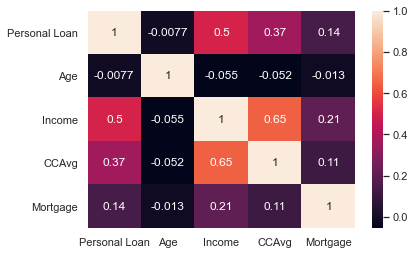

In [112]:
sns.heatmap(df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr(), annot = True)

#### 2.8 Get data model ready

<b> Select dependent and independent variables </b>

In [113]:
## Define X and Y variables

X = df.drop(['ID','Experience', 'Personal Loan'], axis=1)
Y = df[['Personal Loan']]


### 3. Split the data into training and test set in the ratio of 70:30 respectively

In [114]:
##Split into training and test set

# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

### 4. Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance

In [115]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=1);

logreg.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [137]:
# Checking Parameters of logistic regression
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

<b> Training Data: Model Metrics </b>

In [140]:
predict = logreg.predict(X_train)
predictProb = logreg.predict_proba(X_train)

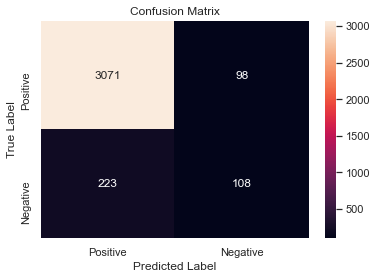

In [141]:
# Confusion Matrix
cm = confusion_matrix(y_train, predict)

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<b> Evaluating the model performance (Training data) </b>

In [142]:
print(classification_report(y_train, predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3169
           1       0.52      0.33      0.40       331

    accuracy                           0.91      3500
   macro avg       0.73      0.65      0.68      3500
weighted avg       0.89      0.91      0.90      3500



<b> Test Data: Model Metrics </b>

In [143]:
predict = logreg.predict(X_test)
predictProb = logreg.predict_proba(X_test)


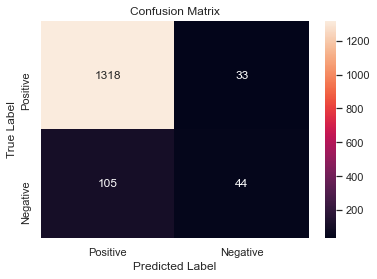

In [144]:
# Confusion Matrix
cm = confusion_matrix(y_test, predict)

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<b> Evaluating the model performance (Test data) </b>


In [145]:
print(classification_report(y_test, predict))

pd.DataFrame(data=[accuracy_score(y_test, predict), recall_score(y_test, predict),
                   precision_score(y_test, predict), roc_auc_score(y_test, predict)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.30      0.39       149

    accuracy                           0.91      1500
   macro avg       0.75      0.64      0.67      1500
weighted avg       0.89      0.91      0.89      1500



,0
accuracy,0.908000
recall,0.295302
precision,0.571429
roc_auc_score,0.635438


### 5. Check different parameters of Logistic Regression and give your reasoning whether the model performance is affected due to it or not? 

In [146]:
#new model
model_new = LogisticRegression(C=0.75, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

model_new.fit(X_train,y_train)


predicted = model_new.predict(X_test)

# Evaluate model performance 
print(classification_report(y_test, predicted))
print('Accuracy on train set: {:.2f}'.format(model_new.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(model_new.score(X_test,  y_test)))
print('Recall score: {:.2f}'.format(recall_score(y_test,predicted)))
print('ROC AUC score: {:.2f}'.format(roc_auc_score(y_test,predicted)))
print('Precision score: {:.2f}'.format(precision_score(y_test,predicted)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.88      0.56      0.69       149

    accuracy                           0.95      1500
   macro avg       0.92      0.78      0.83      1500
weighted avg       0.95      0.95      0.94      1500

Accuracy on train set: 0.95
Accuracy on test set: 0.95
Recall score: 0.56
ROC AUC score: 0.78
Precision score: 0.88


<b> Insights: </b>

    
Running the new models with changing the parameters shows us that changing the parameters really
some excellent changes to the model. As we can see the that the accuracy has slightly changed.

### 6.Give Business understanding of your model.

It is a great model for banks to attract the right people for the loan with less hustle and time. It can also be used in other domains, like the medical and real states. Furthermore, the banks can improve this model to add more features and use it for their other domains.